In [7]:
pip install C:\Users\sneha\Downloads\Cartopy-0.19.0.post1-cp38-cp38-win_amd64.whl

Processing c:\users\sneha\downloads\cartopy-0.19.0.post1-cp38-cp38-win_amd64.whl
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37263 sha256=99ba62392152760094f4036116fbf0fee3eaf271a154ef9b6df6a74f6179ab56
  Stored in directory: c:\users\sneha\appdata\local\pip\cache\wheels\1f\1b\b5\54affbefc8a7e2bdf1da000fc576b8a1c91338f1f327a04f4c
Successfully built pyshp
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install C:\Users\sneha\Downloads\rasterio-1.2.3-cp38-cp38-win_amd64.whl

Processing c:\users\sneha\downloads\rasterio-1.2.3-cp38-cp38-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install contextily

  Using cached contextily-1.1.0-py3-none-any.whl (24 kB)
  Using cached geopy-2.1.0-py3-none-any.whl (112 kB)
  Using cached mercantile-1.2.1-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install splot

  Created wheel for splot: filename=splot-1.1.3-py3-none-any.whl size=37865 sha256=482907f722dcdfa311635945977c93fce52e8dfe0961c7b554f0ea55556f0a2d
  Stored in directory: c:\users\sneha\appdata\local\pip\cache\wheels\2e\69\f4\7219a1d43dd61eba0fd69b9fb583bc71abdd353504d72fade7
Successfully built splot
Note: you may need to restart the kernel to use updated packages.


In [12]:
# Import required packages
import matplotlib as mpl
from matplotlib import colors

%matplotlib inline
mpl.rcParams['figure.figsize'] = (15, 10) #this increases the inline figure size to 15 tall x 10 wide

import seaborn
import pandas as pd
import geopandas as gpd
import pysal
import numpy as np
import mapclassify
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') # Change settings so that warnings are not displayed

import contextily as cx
from shapely.geometry import Polygon
import plotly.express as px
from pysal.explore import esda
from pysal.lib import weights
from splot.esda import plot_moran
from splot.esda import moran_scatterplot
from splot.esda import plot_local_autocorrelation
from splot.esda import lisa_cluster
from esda.moran import Moran_Local

# Loading a few new packages
from scipy import stats
from pysal.model import spreg
import statsmodels.formula.api as sm

In [15]:
hp = gpd.read_file('C:/Users/sneha/OneDrive/Desktop/Sem2/Data analytics project-NCG613/project/data_opens_3.geojson') #2011 housing points with some additional factors calculated
a = gpd.read_file('C:/Users/sneha/OneDrive/Desktop/Sem2/Data analytics project-NCG613/project/OutputAreas.geojson')
KM = gpd.read_file('C:/Users/sneha/OneDrive/Desktop/Sem2/Data analytics project-NCG613/project/KM_Zero.geojson')
lb = gpd.read_file('C:/Users/sneha/OneDrive/Desktop/Sem2/Data analytics project-NCG613/project/london_boroughs.geojson')

In [16]:
hp.head()

index postcode      price dateoftransfer propertytype oldnew duration  \
0     2   CR53EZ  1000000.0     2011-12-22            D      Y        F   
1    29  EC2Y8BN   750000.0     2011-09-16            F      N        L   
2    32  EC2Y8AY   500000.0     2011-05-20            F      N        L   
3    41  EC2Y8DD   840000.0     2011-05-16            F      N        L   
4    56  EC1A4HU   479000.0     2011-12-22            F      N        L   

  categorytype recordstatus    year  ...     priceper      pcd      pcd2  \
0            A            A  2011.0  ...  3311.258278  CR5 3EZ  CR5  3EZ   
1            A            A  2011.0  ...  9172.067996  EC2Y8BN  EC2Y 8BN   
2            A            A  2011.0  ...  8567.511995  EC2Y8AY  EC2Y 8AY   
3            A            A  2011.0  ...  7262.666436  EC2Y8DD  EC2Y 8DD   
4            A            A  2011.0  ...  7942.298126  EC1A4HU  EC1A 4HU   

     dointr doterm  ID          Dist_Road  Dist_Transit Dist_OpenSpace  \
0  201107.0    NaN   3  310.9087078390314   1273.505462     531.854940   
1  198001.0    NaN  30  766.5487637479208    155.632804      11.049536   
2  198001.0    NaN  33  810.2845236975538    206.439232      56.983984   
3  198001.0    NaN  42  641.1163295189118    366.098660       9.839361   
4  200106.0    NaN  57  1025.425270458795    229.436428      52.992419   

                        geometry  
0  POINT (528925.000 157964.000)  
1  POINT (532540.000 181716.000)  
2  POINT (532480.000 181690.000)  
3  POINT (532418.000 181908.000)  
4  POINT (532118.000 181647.000)  

[5 rows x 22 columns]

In [17]:
hp['Detached'] = np.where(hp['propertytype']=='D', 1, 0)
hp['Flats'] = np.where(hp['propertytype']=='F', 1, 0)
hp['New'] = np.where(hp['oldnew']=='Y', 1, 0)

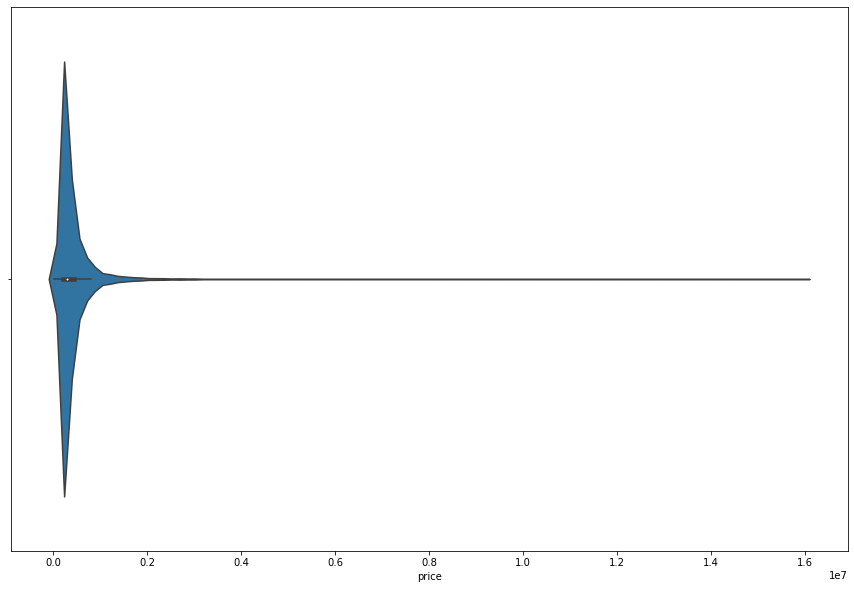

In [18]:
bx = seaborn.violinplot(x=hp["price"])

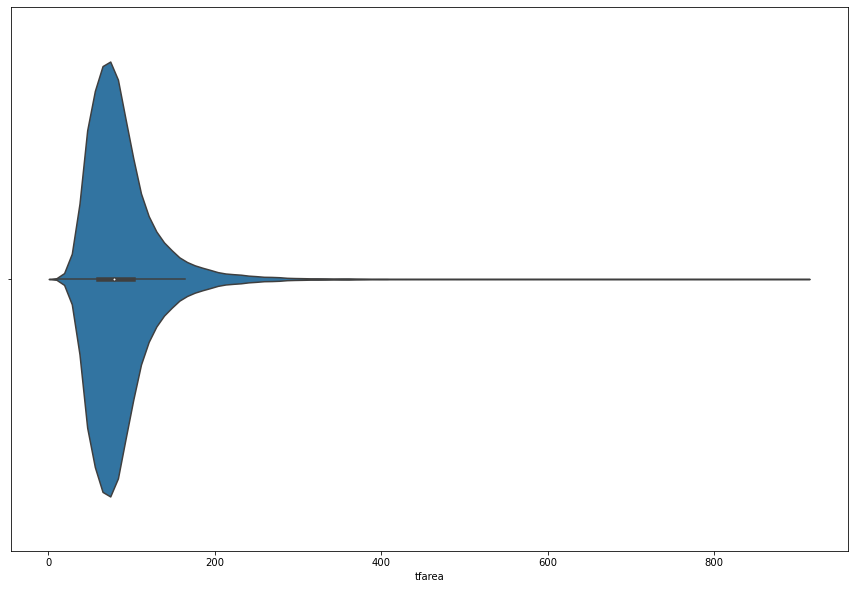

In [19]:
bx = seaborn.violinplot(x=(hp["tfarea"]))

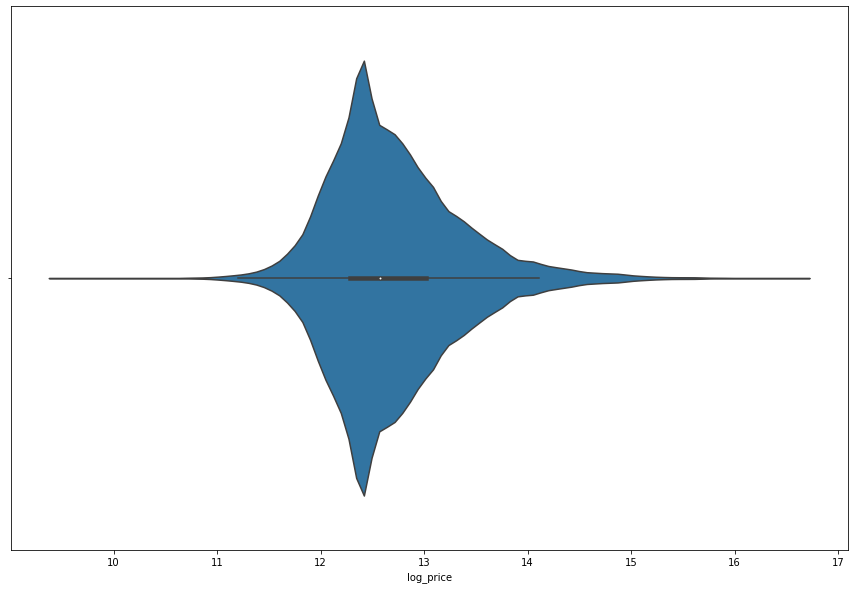

In [20]:
hp['log_area'] = np.log(hp['tfarea'])
hp['log_price'] = np.log(hp['price'])
bx = seaborn.violinplot(x=hp["log_price"])

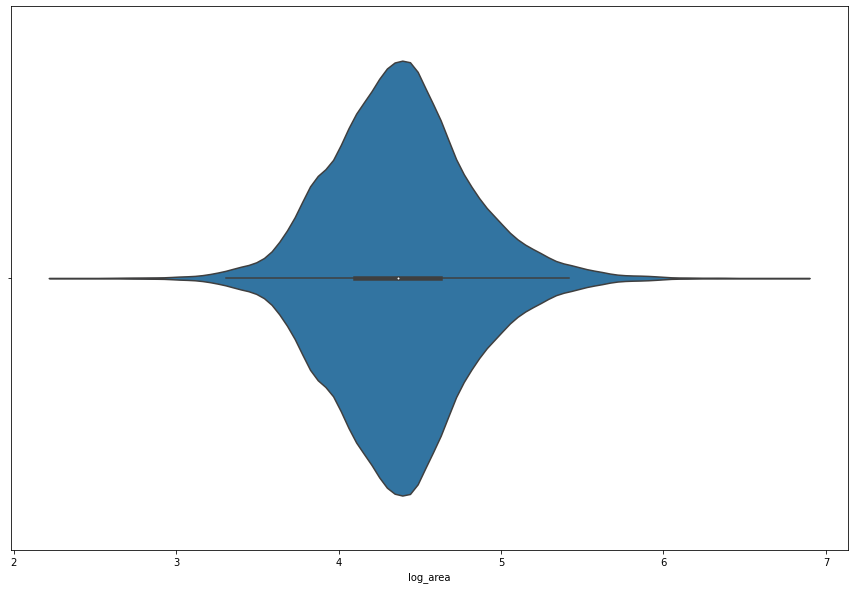

In [22]:
bx = seaborn.violinplot(x=hp["log_area"])

In [23]:
variable_names = ['log_area', 'numberrooms', 'Flats', 'Detached','New']

In [24]:
m1 = spreg.OLS(hp[['log_price']].values, hp[variable_names].values,
                name_y='log_price', name_x=variable_names, robust='white')
print(m1.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   log_price                Number of Observations:       71733
Mean dependent var  :     12.6945                Number of Variables   :           6
S.D. dependent var  :      0.6363                Degrees of Freedom    :       71727
R-squared           :      0.4677
Adjusted R-squared  :      0.4677
Sum squared residual:   15458.531                F-statistic           :  12606.6256
Sigma-square        :       0.216                Prob(F-statistic)     :           0
S.E. of regression  :       0.464                Log likelihood        :  -46737.177
Sigma-square ML     :       0.216                Akaike info criterion :   93486.354
S.E of regression ML:      0.4642                Schwarz criterion     :   93541.438

White Standard Errors
-------------------------------------------------------

In [28]:
np.exp(0.0379068) - 1

0.03863442763878777

In [29]:
np.exp(0.2669421) - 1

0.30596482877796105

In [33]:
(1.1)**1.0176671 - 1 #we expect to see a 10.2% increase in housing price for every 10% increase in housing size.

0.10185380025229418

In [34]:
1.0176671/0.0094878 #t-value for log_area

107.26059782035878

In [35]:
hp2 = gpd.sjoin(hp,a)
pd.set_option('display.max_columns', None)
hp2.head()

index postcode      price dateoftransfer propertytype oldnew duration  \
0           2   CR53EZ  1000000.0     2011-12-22            D      Y        F   
14373  132454   CR53ED   950000.0     2011-11-29            D      N        F   
14441  133134   CR53ER   555000.0     2011-01-20            D      N        F   
14944  138724   CR53EH   495000.0     2011-11-17            D      N        F   
15030  139620   CR53QA   405000.0     2011-09-23            D      N        F   

      categorytype recordstatus    year  tfarea  numberrooms     priceper  \
0                A            A  2011.0  302.00          9.0  3311.258278   
14373            A            A  2011.0  264.75         10.0  3588.290840   
14441            A            A  2011.0  185.00          7.0  3000.000000   
14944            A            A  2011.0  191.19          8.0  2589.047544   
15030            A            A  2011.0   63.96          5.0  6332.082552   

           pcd      pcd2    dointr  doterm      ID          Dist_Road  \
0      CR5 3EZ  CR5  3EZ  201107.0     NaN       3  310.9087078390314   
14373  CR5 3ED  CR5  3ED  199007.0     NaN  132455  391.9983923256881   
14441  CR5 3ER  CR5  3ER  199308.0     NaN  133135  42.01314846845171   
14944  CR5 3EH  CR5  3EH  199007.0     NaN  138725  127.7245807778461   
15030  CR5 3QA  CR5  3QA  199007.0     NaN  139621  247.9782101753372   

       Dist_Transit  Dist_OpenSpace                       geometry  Detached  \
0       1273.505462      531.854940  POINT (528925.000 157964.000)         1   
14373   1183.977889      559.912286  POINT (528806.000 157882.000)         1   
14441   1483.402493      649.963477  POINT (529126.000 157740.000)         1   
14944   1327.320045      585.743002  POINT (529109.000 157935.000)         1   
15030   1288.842874      525.809125  POINT (529024.000 158049.000)         1   

       Flats  New  log_area  log_price  index_right   geo_code  \
0          0    1  5.710427  13.815511        19031  E00005097   
14373      0    0  5.578786  13.764217        19031  E00005097   
14441      0    0  5.220356  13.226723        19031  E00005097   
14944      0    0  5.253268  13.112313        19031  E00005097   
15030      0    0  4.158258  12.911642        19031  E00005097   

                             label   NAME_2    POP   POPDENS     HH  HECTARES  \
0      E92000001E09000008E00005097  Croydon  399.0  6.621308  133.0     60.26   
14373  E92000001E09000008E00005097  Croydon  399.0  6.621308  133.0     60.26   
14441  E92000001E09000008E00005097  Croydon  399.0  6.621308  133.0     60.26   
14944  E92000001E09000008E00005097  Croydon  399.0  6.621308  133.0     60.26   
15030  E92000001E09000008E00005097  Croydon  399.0  6.621308  133.0     60.26   

        DEPRHH EMPRES   STUDENT   PROFSCI  Trees  TreeDens  
0      0.37594    197  0.062914  0.127451   21.0   0.34849  
14373  0.37594    197  0.062914  0.127451   21.0   0.34849  
14441  0.37594    197  0.062914  0.127451   21.0   0.34849  
14944  0.37594    197  0.062914  0.127451   21.0   0.34849  
15030  0.37594    197  0.062914  0.127451   21.0   0.34849

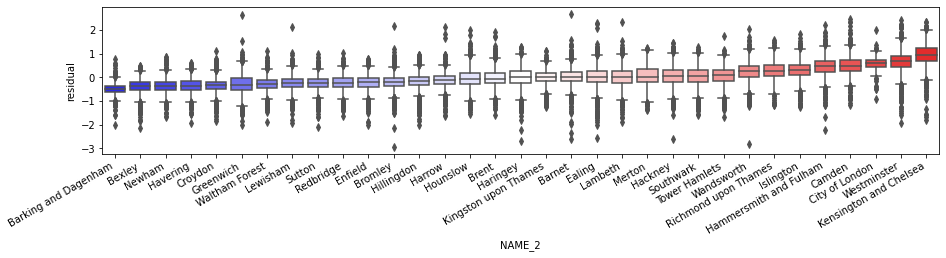

In [36]:
hp2['residual'] = m1.u
medians = hp2.groupby("NAME_2").residual.median().to_frame('hood_residual')

f = plt.figure(figsize=(15,3))
ax = plt.gca()
seaborn.boxplot('NAME_2', 'residual', ax = ax,
                data=hp2.merge(medians, how='left',
                              left_on='NAME_2',
                              right_index=True)
                   .sort_values('hood_residual'), palette='bwr')
f.autofmt_xdate()
plt.show()

In [37]:
w = weights.DistanceBand.from_dataframe(hp2, 500) # Weights based on features within 500 meters

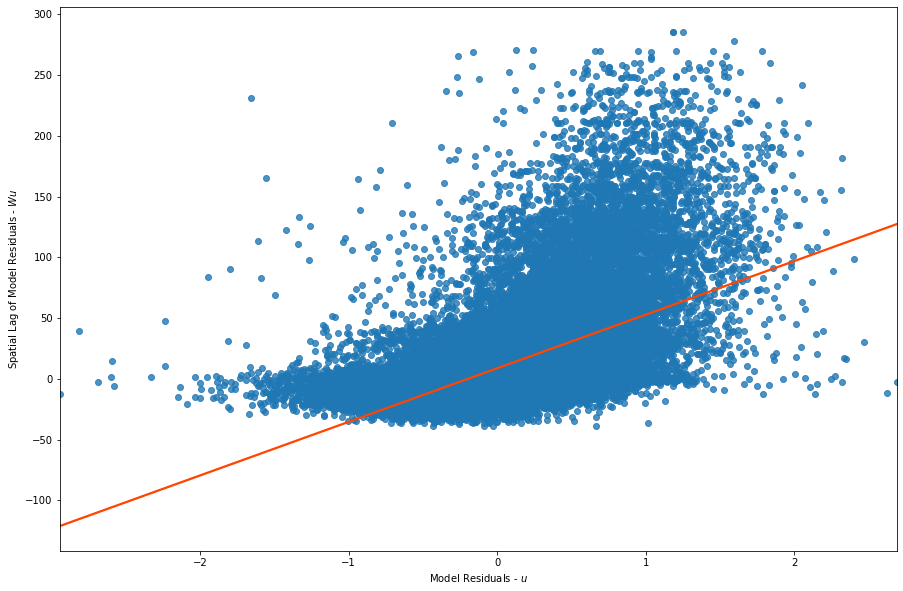

In [38]:
lag_residual = weights.spatial_lag.lag_spatial(w, m1.u)
ax = seaborn.regplot(m1.u.flatten(), lag_residual.flatten(), 
                     line_kws=dict(color='orangered'),
                     ci=None)
ax.set_xlabel('Model Residuals - $u$')
ax.set_ylabel('Spatial Lag of Model Residuals - $W u$');

('WARNING: ', 2194, ' is an island (no neighbors)')
('WARNING: ', 3554, ' is an island (no neighbors)')
('WARNING: ', 2775, ' is an island (no neighbors)')
('WARNING: ', 5904, ' is an island (no neighbors)')
('WARNING: ', 8525, ' is an island (no neighbors)')
('WARNING: ', 10709, ' is an island (no neighbors)')
('WARNING: ', 11985, ' is an island (no neighbors)')
('WARNING: ', 9047, ' is an island (no neighbors)')
('WARNING: ', 12129, ' is an island (no neighbors)')
('WARNING: ', 9578, ' is an island (no neighbors)')
('WARNING: ', 11407, ' is an island (no neighbors)')
('WARNING: ', 10536, ' is an island (no neighbors)')
('WARNING: ', 10683, ' is an island (no neighbors)')
('WARNING: ', 11822, ' is an island (no neighbors)')
('WARNING: ', 13962, ' is an island (no neighbors)')
('WARNING: ', 14264, ' is an island (no neighbors)')
('WARNING: ', 14388, ' is an island (no neighbors)')
('WARNING: ', 15677, ' is an island (no neighbors)')
('WARNING: ', 18951, ' is an island (no neighbors)')


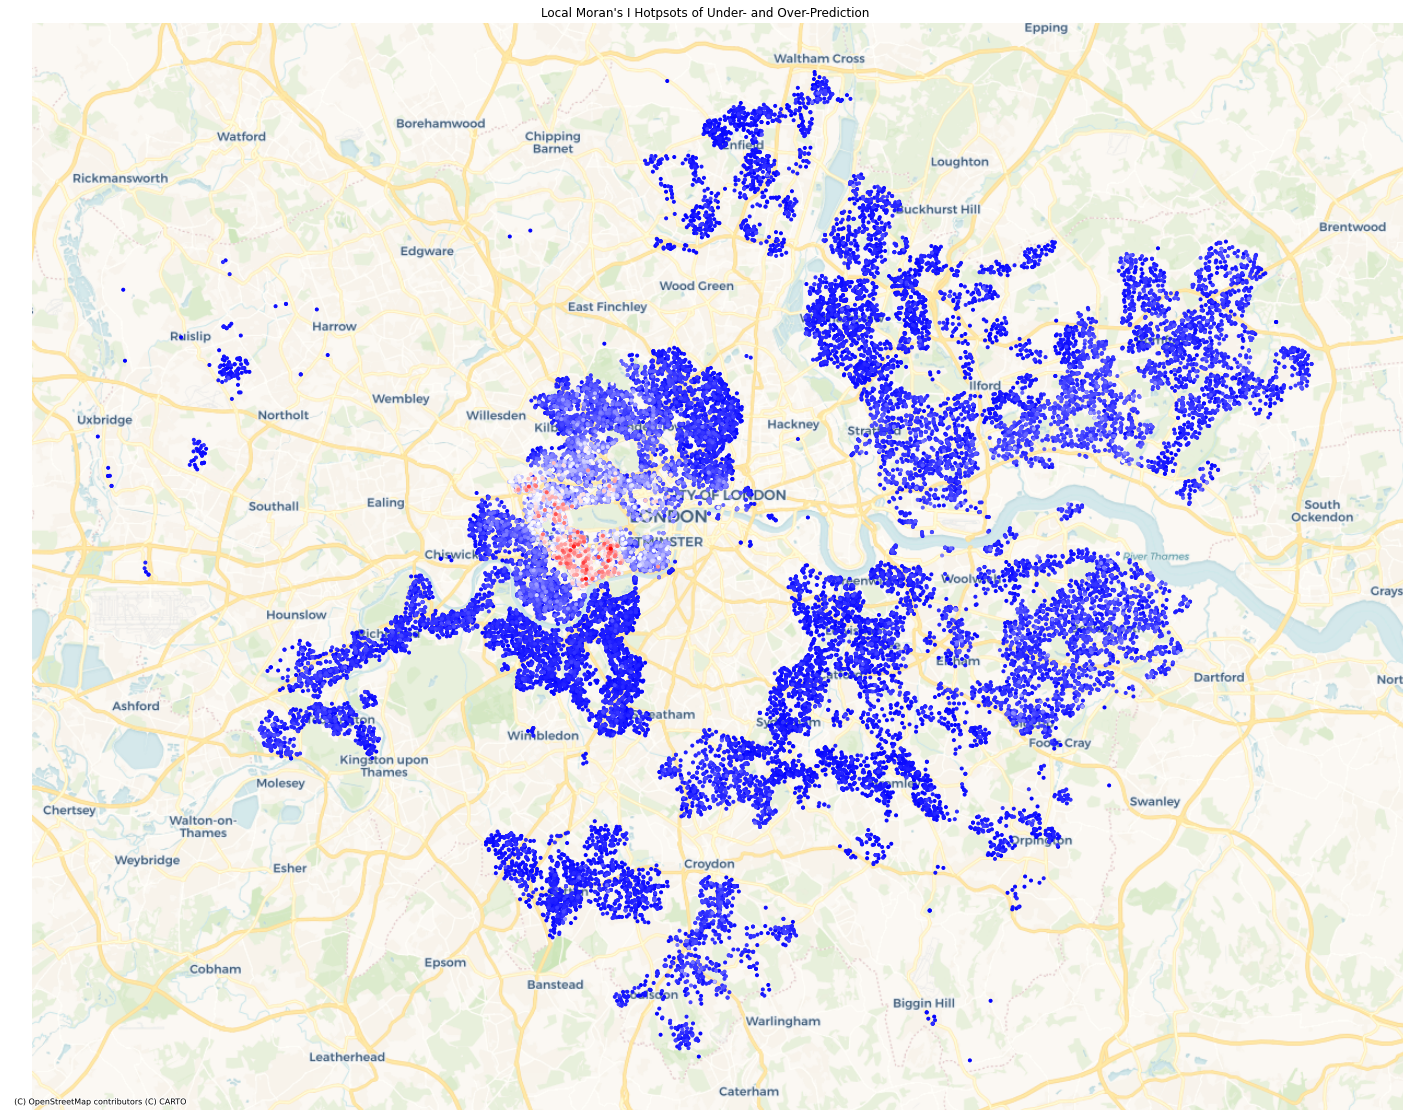

In [39]:
outliers = esda.moran.Moran_Local(m1.u, w, permutations=999)
error_clusters = (outliers.q % 2 == 1) # only the cluster cores
error_clusters &= (outliers.p_sim <= .001) # filtering out non-significant clusters
f, ax = plt.subplots(1, figsize=(25, 20)) #Subplots allows you to draw multiple plots in one figure
hp2.assign(error_clusters = error_clusters,
          local_I = outliers.Is)\
  .query("error_clusters")\
  .sort_values('local_I')\
  .to_crs('EPSG:3857').plot('local_I', cmap='bwr', marker='.', ax=ax)
ax.set_title("Local Moran's I Hotpsots of Under- and Over-Prediction")
ax.set_axis_off() #Remove axes from plot 
plt.axis('equal') #Set x and y axes to be equal size
cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager)

In [40]:
f = 'log_price ~ ' + ' + '.join(variable_names) + ' + NAME_2 - 1' # Remove intercept (-1) in this fixed effects model
print(f)

log_price ~ log_area + numberrooms + Flats + Detached + New + NAME_2 - 1


In [41]:
m2 = sm.ols(f, data=hp2).fit()
print(m2.summary2())

                        Results: Ordinary least squares
Model:                  OLS                  Adj. R-squared:         0.752     
Dependent Variable:     log_price            AIC:                    38196.3900
Date:                   2021-05-11 19:48     BIC:                    38544.9184
No. Observations:       71097                Log-Likelihood:         -19060.   
Df Model:               37                   F-statistic:            5828.     
Df Residuals:           71059                Prob (F-statistic):     0.00      
R-squared:              0.752                Scale:                  0.10014   
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------------------
NAME_2[Barking and Dagenham]    8.5450   0.0210 406.6309 0.0000  8.5038  8.5862
NAME_2[Barnet]                  9.1532   0.0202 453.4906 0.0000 

In [42]:
neighborhood_effects = m2.params.filter(like='NAME_2')
neighborhood_effects.head()

NAME_2[Barking and Dagenham]    8.545000
NAME_2[Barnet]                  9.153167
NAME_2[Bexley]                  8.653961
NAME_2[Brent]                   9.118544
NAME_2[Bromley]                 8.874468
dtype: float64

In [43]:
stripped = neighborhood_effects.index.str.strip('NAME_2[').str.strip(']')
neighborhood_effects.index = stripped
neighborhood_effects = neighborhood_effects.to_frame('fixed_effect')
neighborhood_effects.head()

fixed_effect
Barking and Dagenham      8.545000
Barnet                    9.153167
Bexley                    8.653961
Brent                     9.118544
Bromley                   8.874468

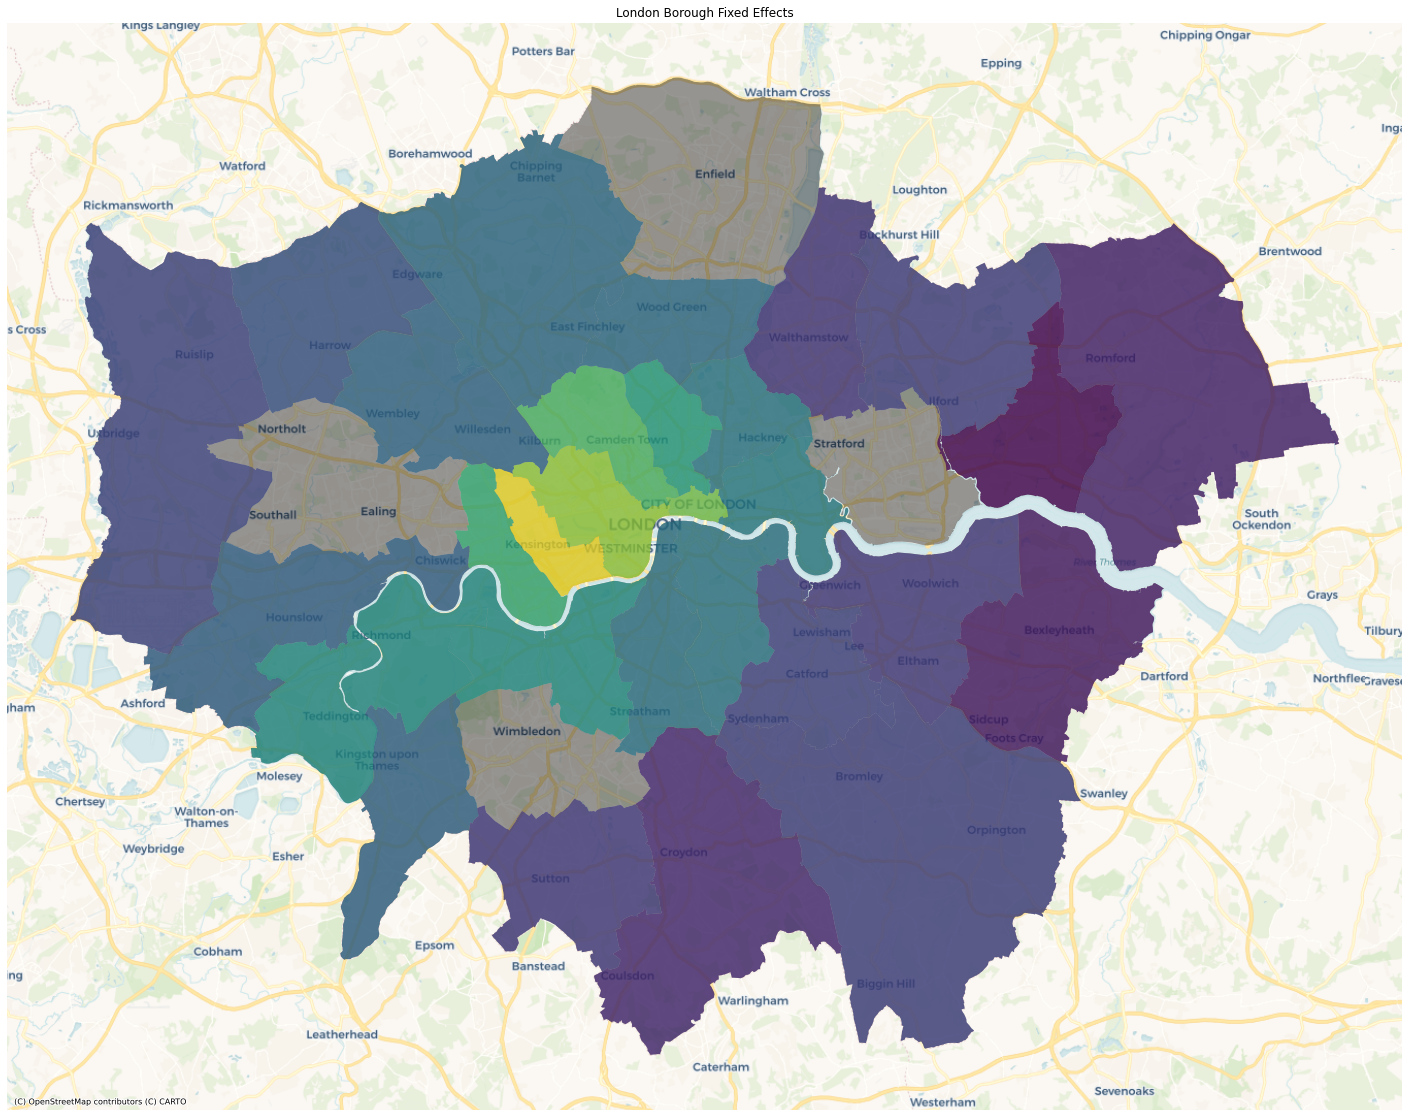

In [44]:
neighborhood_effects['NAME'] = neighborhood_effects.index
f, ax = plt.subplots(1, figsize=(25, 20)) #Subplots allows you to draw multiple plots in one figure
lb.to_crs('EPSG:3857').plot(ax=ax, color='k', alpha=0.4)
lb.merge(neighborhood_effects, how='left',
                    left_on='NAME', 
                    right_on='NAME')\
                  .dropna(subset=['fixed_effect'])\
                  .to_crs('EPSG:3857').plot('fixed_effect',
                        ax=ax, alpha=.7)
ax.set_title("London Borough Fixed Effects")
ax.set_axis_off() #Remove axes from plot 
plt.axis('equal') #Set x and y axes to be equal size
cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager)

In [46]:
hp_0km = hp2.geometry.apply(lambda x: KM.distance(x).min()) #KM0 = the central point of London near Trafalgar square
hp_0km.head()

0        22442.160157
14373    22530.237359
14441    22656.936031
14944    22462.788624
15030    22352.568686
Name: geometry, dtype: float64

In [47]:
hp_0km_2 = pd.merge(hp2, hp_0km, left_index=True, right_index=True)
hp_0km_3 = hp_0km_2.rename(index=str, columns={"geometry_y":"Dist_0KM", "geometry_x":"geometry"})
hp_0km_3.head()

index postcode      price dateoftransfer propertytype oldnew duration  \
0           2   CR53EZ  1000000.0     2011-12-22            D      Y        F   
14373  132454   CR53ED   950000.0     2011-11-29            D      N        F   
14441  133134   CR53ER   555000.0     2011-01-20            D      N        F   
14944  138724   CR53EH   495000.0     2011-11-17            D      N        F   
15030  139620   CR53QA   405000.0     2011-09-23            D      N        F   

      categorytype recordstatus    year  tfarea  numberrooms     priceper  \
0                A            A  2011.0  302.00          9.0  3311.258278   
14373            A            A  2011.0  264.75         10.0  3588.290840   
14441            A            A  2011.0  185.00          7.0  3000.000000   
14944            A            A  2011.0  191.19          8.0  2589.047544   
15030            A            A  2011.0   63.96          5.0  6332.082552   

           pcd      pcd2    dointr  doterm      ID          Dist_Road  \
0      CR5 3EZ  CR5  3EZ  201107.0     NaN       3  310.9087078390314   
14373  CR5 3ED  CR5  3ED  199007.0     NaN  132455  391.9983923256881   
14441  CR5 3ER  CR5  3ER  199308.0     NaN  133135  42.01314846845171   
14944  CR5 3EH  CR5  3EH  199007.0     NaN  138725  127.7245807778461   
15030  CR5 3QA  CR5  3QA  199007.0     NaN  139621  247.9782101753372   

       Dist_Transit  Dist_OpenSpace                       geometry  Detached  \
0       1273.505462      531.854940  POINT (528925.000 157964.000)         1   
14373   1183.977889      559.912286  POINT (528806.000 157882.000)         1   
14441   1483.402493      649.963477  POINT (529126.000 157740.000)         1   
14944   1327.320045      585.743002  POINT (529109.000 157935.000)         1   
15030   1288.842874      525.809125  POINT (529024.000 158049.000)         1   

       Flats  New  log_area  log_price  index_right   geo_code  \
0          0    1  5.710427  13.815511        19031  E00005097   
14373      0    0  5.578786  13.764217        19031  E00005097   
14441      0    0  5.220356  13.226723        19031  E00005097   
14944      0    0  5.253268  13.112313        19031  E00005097   
15030      0    0  4.158258  12.911642        19031  E00005097   

                             label   NAME_2    POP   POPDENS     HH  HECTARES  \
0      E92000001E09000008E00005097  Croydon  399.0  6.621308  133.0     60.26   
14373  E92000001E09000008E00005097  Croydon  399.0  6.621308  133.0     60.26   
14441  E92000001E09000008E00005097  Croydon  399.0  6.621308  133.0     60.26   
14944  E92000001E09000008E00005097  Croydon  399.0  6.621308  133.0     60.26   
15030  E92000001E09000008E00005097  Croydon  399.0  6.621308  133.0     60.26   

        DEPRHH EMPRES   STUDENT   PROFSCI  Trees  TreeDens  residual  \
0      0.37594    197  0.062914  0.127451   21.0   0.34849 -0.460929   
14373  0.37594    197  0.062914  0.127451   21.0   0.34849  0.706921   
14441  0.37594    197  0.062914  0.127451   21.0   0.34849  0.682601   
14944  0.37594    197  0.062914  0.127451   21.0   0.34849  0.391566   
15030  0.37594    197  0.062914  0.127451   21.0   0.34849  0.568339   

           Dist_0KM  
0      22442.160157  
14373  22530.237359  
14441  22656.936031  
14944  22462.788624  
15030  22352.568686

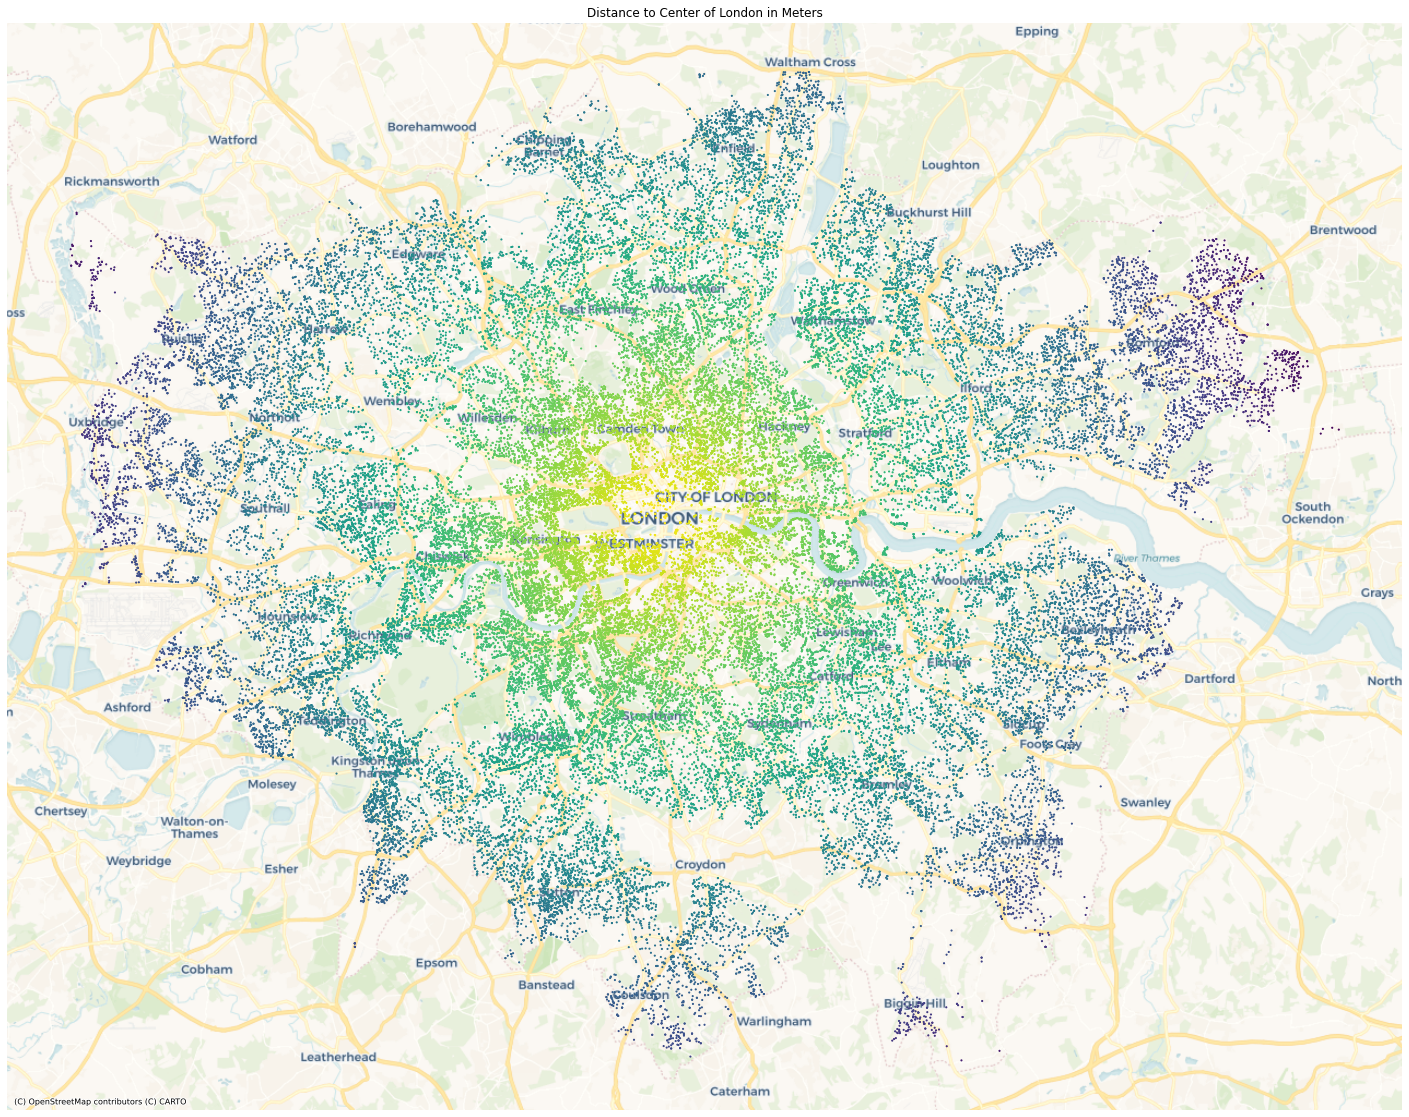

In [48]:
color_map = plt.cm.get_cmap('viridis')
reversed_color_map = color_map.reversed()
f, ax = plt.subplots(1, figsize=(25, 20)) #Subplots allows you to draw multiple plots in one figure
hp_0km_3.to_crs('EPSG:3857').plot('Dist_0KM', cmap=reversed_color_map, marker='.', s=5, ax=ax)
ax.set_axis_off() #Remove axes from plot 
ax.set_title('Distance to Center of London in Meters') #Plot title text
plt.axis('equal') #Set x and y axes to be equal size
cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager)

In [49]:
base_names = variable_names
dist_names = variable_names + ['Dist_0KM']

In [50]:
m3 = spreg.OLS(hp_0km_3[['log_price']].values, hp_0km_3[dist_names].values,
                name_y='log_price', name_x=dist_names, robust='white')
print(m3.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   log_price                Number of Observations:       71733
Mean dependent var  :     12.6945                Number of Variables   :           7
S.D. dependent var  :      0.6363                Degrees of Freedom    :       71726
R-squared           :      0.6352
Adjusted R-squared  :      0.6352
Sum squared residual:   10594.944                F-statistic           :  20815.4576
Sigma-square        :       0.148                Prob(F-statistic)     :           0
S.E. of regression  :       0.384                Log likelihood        :  -33187.383
Sigma-square ML     :       0.148                Akaike info criterion :   66388.765
S.E of regression ML:      0.3843                Schwarz criterion     :   66453.030

White Standard Errors
-------------------------------------------------------

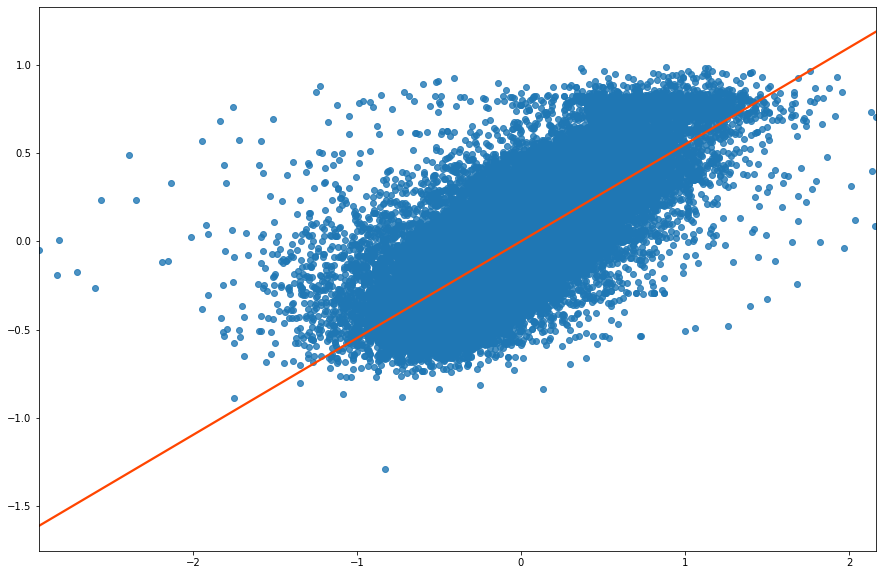

In [51]:
lag_residual = weights.spatial_lag.lag_spatial(w, m3.u)
seaborn.regplot(m3.u.flatten(), lag_residual.flatten(), 
                line_kws=dict(color='orangered'),
                ci=None);

In [52]:
hp_0km_3["Dist_Road"] = pd.to_numeric(hp_0km_3["Dist_Road"])
all_names = dist_names + ["Dist_Road"] + ['Dist_Transit'] + ['Dist_OpenSpace'] + ['DEPRHH']
all_names

['log_area',
 'numberrooms',
 'Flats',
 'Detached',
 'New',
 'Dist_0KM',
 'Dist_Road',
 'Dist_Transit',
 'Dist_OpenSpace',
 'DEPRHH']

In [53]:
m4 = spreg.OLS(hp_0km_3[['log_price']].values, hp_0km_3[all_names].values,
                name_y='log_price', name_x=all_names, robust='white')
print(m4.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :   log_price                Number of Observations:       71733
Mean dependent var  :     12.6945                Number of Variables   :          11
S.D. dependent var  :      0.6363                Degrees of Freedom    :       71722
R-squared           :      0.7109
Adjusted R-squared  :      0.7108
Sum squared residual:    8397.437                F-statistic           :  17633.5631
Sigma-square        :       0.117                Prob(F-statistic)     :           0
S.E. of regression  :       0.342                Log likelihood        :  -24850.203
Sigma-square ML     :       0.117                Akaike info criterion :   49722.406
S.E of regression ML:      0.3421                Schwarz criterion     :   49823.394

White Standard Errors
-------------------------------------------------------

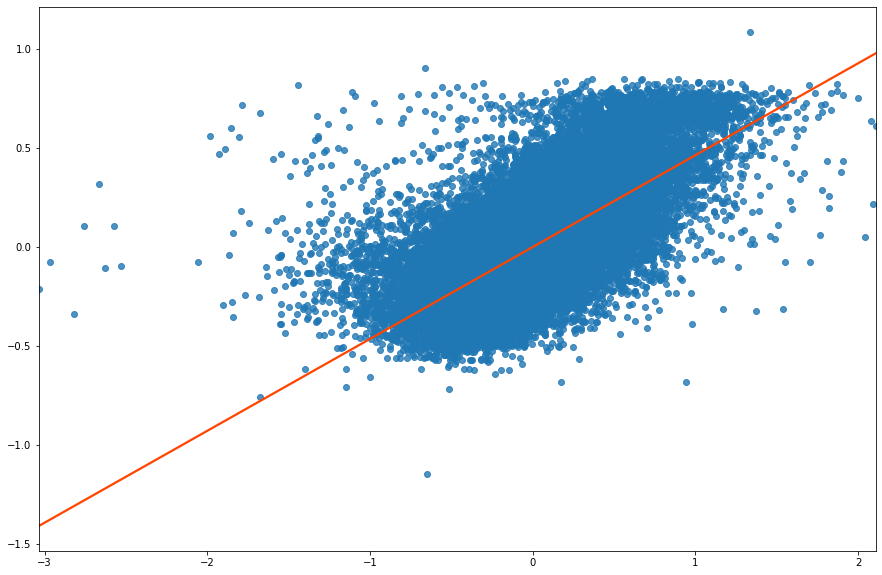

In [54]:
lag_residual = weights.spatial_lag.lag_spatial(w, m4.u)
seaborn.regplot(m4.u.flatten(), lag_residual.flatten(), 
                line_kws=dict(color='orangered'),
                ci=None);

In [55]:
m4 = spreg.OLS(hp_0km_3[['log_price']].values, hp_0km_3[all_names].values,
                name_y='log_price', name_x=all_names, robust='white', w=w, spat_diag=True, moran=True)
print(m4.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :   log_price                Number of Observations:       71733
Mean dependent var  :     12.6945                Number of Variables   :          11
S.D. dependent var  :      0.6363                Degrees of Freedom    :       71722
R-squared           :      0.7109
Adjusted R-squared  :      0.7108
Sum squared residual:    8397.437                F-statistic           :  17633.5631
Sigma-square        :       0.117                Prob(F-statistic)     :           0
S.E. of regression  :       0.342                Log likelihood        :  -24850.203
Sigma-square ML     :       0.117                Akaike info criterion :   49722.406
S.E of regression ML:      0.3421                Schwarz criterion     :   49823.394

White Standard Errors
-------------------------------------------------------

In [90]:
m5 = spreg.GM_Lag(hp_0km_3[['log_price']].values, hp_0km_3[all_names].values,
                     w=w, name_y='log_price', name_x=all_names, robust='white')
print(m5.summary)


Exception: x array cannot contain a constant vector; constant will be added automatically

In [89]:
hp_0km_3['Detached'] = hp_0km_3['Detached'].astype(float)
hp_0km_3['Flats'] = hp_0km_3['Flats'].astype(float)
hp_0km_3['New'] = hp_0km_3['New'].astype(float)

hp_0km_3['price'] = hp_0km_3['price'].astype(float)
hp_0km_3['tfarea'] = hp_0km_3['tfarea'].astype(float)
hp_0km_3['numberrooms'] = hp_0km_3['numberrooms'].astype(float)

hp_0km_3['priceper'] = hp_0km_3['priceper'].astype(float)
hp_0km_3['Dist_Road'] = hp_0km_3['Dist_Road'].astype(float)
hp_0km_3['Dist_Transit'] = hp_0km_3['Dist_Transit'].astype(float)
hp_0km_3['Dist_OpenSpace'] = hp_0km_3['Dist_OpenSpace'].astype(float)

hp_0km_3['Dist_0KM'] = hp_0km_3['Dist_0KM'].astype(float)
hp_0km_3['DEPRHH'] = hp_0km_3['DEPRHH'].astype(float)
hp_0km_3['log_area'] = hp_0km_3['log_area'].astype(float)
hp_0km_3['log_price'] = hp_0km_3['log_price'].astype(float)



In [92]:
hp_0km_3.head()

index postcode      price dateoftransfer propertytype oldnew duration  \
0           2   CR53EZ  1000000.0     2011-12-22            D      Y        F   
14373  132454   CR53ED   950000.0     2011-11-29            D      N        F   
14441  133134   CR53ER   555000.0     2011-01-20            D      N        F   
14944  138724   CR53EH   495000.0     2011-11-17            D      N        F   
15030  139620   CR53QA   405000.0     2011-09-23            D      N        F   

      categorytype recordstatus    year  tfarea  numberrooms  priceper  \
0                A            A  2011.0   302.0          9.0    3311.0   
14373            A            A  2011.0   264.0         10.0    3588.0   
14441            A            A  2011.0   185.0          7.0    3000.0   
14944            A            A  2011.0   191.0          8.0    2589.0   
15030            A            A  2011.0    63.0          5.0    6332.0   

           pcd      pcd2    dointr  doterm      ID  Dist_Road  Dist_Transit  \
0      CR5 3EZ  CR5  3EZ  201107.0     NaN       3      310.0        1273.0   
14373  CR5 3ED  CR5  3ED  199007.0     NaN  132455      391.0        1183.0   
14441  CR5 3ER  CR5  3ER  199308.0     NaN  133135       42.0        1483.0   
14944  CR5 3EH  CR5  3EH  199007.0     NaN  138725      127.0        1327.0   
15030  CR5 3QA  CR5  3QA  199007.0     NaN  139621      247.0        1288.0   

       Dist_OpenSpace                       geometry  Detached  Flats  New  \
0               531.0  POINT (528925.000 157964.000)       1.0    0.0  1.0   
14373           559.0  POINT (528806.000 157882.000)       1.0    0.0  0.0   
14441           649.0  POINT (529126.000 157740.000)       1.0    0.0  0.0   
14944           585.0  POINT (529109.000 157935.000)       1.0    0.0  0.0   
15030           525.0  POINT (529024.000 158049.000)       1.0    0.0  0.0   

       log_area  log_price  index_right   geo_code  \
0           5.0       13.0        19031  E00005097   
14373       5.0       13.0        19031  E00005097   
14441       5.0       13.0        19031  E00005097   
14944       5.0       13.0        19031  E00005097   
15030       4.0       12.0        19031  E00005097   

                             label   NAME_2    POP   POPDENS     HH  HECTARES  \
0      E92000001E09000008E00005097  Croydon  399.0  6.621308  133.0     60.26   
14373  E92000001E09000008E00005097  Croydon  399.0  6.621308  133.0     60.26   
14441  E92000001E09000008E00005097  Croydon  399.0  6.621308  133.0     60.26   
14944  E92000001E09000008E00005097  Croydon  399.0  6.621308  133.0     60.26   
15030  E92000001E09000008E00005097  Croydon  399.0  6.621308  133.0     60.26   

       DEPRHH EMPRES   STUDENT   PROFSCI  Trees  TreeDens  residual  Dist_0KM  
0         0.0    197  0.062914  0.127451   21.0   0.34849 -0.460929   22442.0  
14373     0.0    197  0.062914  0.127451   21.0   0.34849  0.706921   22530.0  
14441     0.0    197  0.062914  0.127451   21.0   0.34849  0.682601   22656.0  
14944     0.0    197  0.062914  0.127451   21.0   0.34849  0.391566   22462.0  
15030     0.0    197  0.062914  0.127451   21.0   0.34849  0.568339   22352.0

In [62]:
m7 = spreg.GM_Combo_Het(hp_0km_3[['log_price']].values, hp_0km_3[all_names].values,
                     w=w, name_y='log_price', name_x=all_names)
print(m7.summary)

TypeError: No loop matching the specified signature and casting was found for ufunc add

In [63]:
hpcam = hp_0km_3[(hp_0km_3["NAME_2"]=="Camden")]
wcam = weights.DistanceBand.from_dataframe(hpcam, 500)
m7cam = spreg.GM_Error_Het(hpcam[['log_price']].values, hpcam[all_names].values,
                     w=wcam, name_y='log_price', name_x=all_names)
print(m7cam.summary)

TypeError: No loop matching the specified signature and casting was found for ufunc add